In [3]:
import numpy as np
import pandas as pd
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import EditedNearestNeighbours, TomekLinks, RepeatedEditedNearestNeighbours, AllKNN,InstanceHardnessThreshold
from imblearn.over_sampling import SMOTENC
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from collections import Counter
random_state = 1234

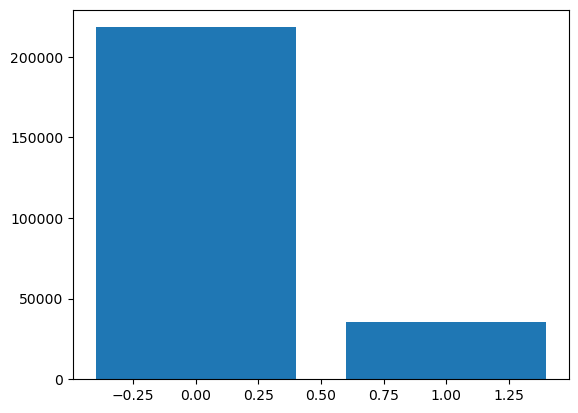

In [4]:
df_diab_binary: pd.DataFrame = pd.read_csv("/home/jitghosh/work/pix/ml/mlproject_diabetes/data/diabetes_binary_health_indicators_BRFSS2015.csv")
df_diab_binary_X = df_diab_binary.drop("Diabetes_binary", axis=1)
df_diab_binary_y = df_diab_binary["Diabetes_binary"]
all_features = set(df_diab_binary_X.columns)
numeric_features = ["BMI", "MentHlth", "PhysHlth"]
cat_features = all_features.difference(set(numeric_features))
cat_features_idx = [idx for idx,name in enumerate(df_diab_binary_X.columns) if name in cat_features]

train_X, test_X, train_y, test_y = train_test_split(
    df_diab_binary_X,
    df_diab_binary_y,
    test_size=0.2,
    random_state=random_state,
    shuffle=True,
    stratify=df_diab_binary_y,
)

label_counts = list(Counter(df_diab_binary["Diabetes_binary"]).values())
#relative distribution of the different classes
fig,ax = plt.subplots(1,1)
ax.bar(x=df_diab_binary_y.unique(),height = label_counts)
plt.show()

test_orig = test_X.join(test_y)
test_orig.to_csv("./diabetes_binary_test_orig.csv",index=False)

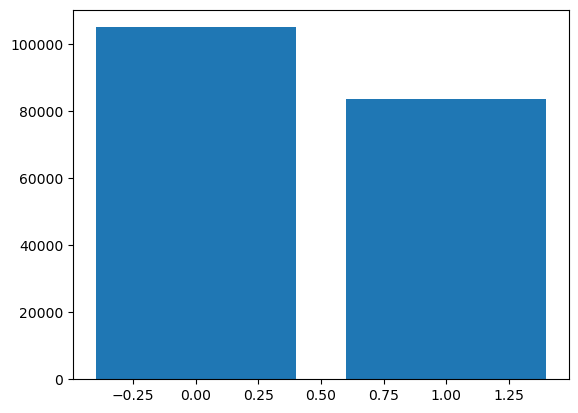

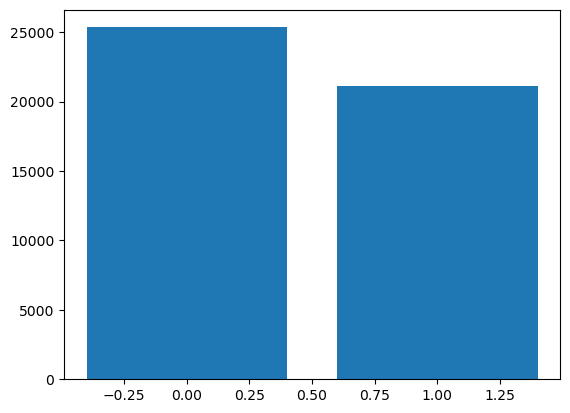

In [3]:
counts_train = Counter(train_y)
counts_train[1.0] = int(counts_train[0.0] * 0.75)
smoteenn = SMOTEENN(
         smote=SMOTENC(categorical_features=cat_features_idx,
                       sampling_strategy=counts_train),
        enn = EditedNearestNeighbours(sampling_strategy="all", kind_sel="all"),        
         random_state=random_state)

train_X_resamp, train_y_resamp = smoteenn.fit_resample(train_X,train_y)

counts_test = Counter(test_y)
counts_test[1.0] = int(counts_test[0.0] * 0.75)
smoteenn = SMOTEENN(smote=SMOTENC(categorical_features=cat_features_idx,
                       sampling_strategy=counts_test),
        enn = EditedNearestNeighbours(sampling_strategy="all", kind_sel="all"),        
         random_state=random_state)

test_X_resamp, test_y_resamp = smoteenn.fit_resample(test_X,test_y)

fig,ax = plt.subplots(1,1)
label_counts = train_y_resamp.groupby(by=lambda idx:train_y_resamp[idx]).count().values
ax.bar(x=train_y_resamp.unique(),height = label_counts)
plt.show()

fig,ax = plt.subplots(1,1)
label_counts = test_y_resamp.groupby(by=lambda idx:test_y_resamp[idx]).count().values
ax.bar(x=test_y_resamp.unique(),height = label_counts)
plt.show()

train_X_resamp.join(train_y_resamp).to_csv("./diabetes_binary_train_overundersamp.csv",index=False)
test_X_resamp.join(test_y_resamp).to_csv("./diabetes_binary_test_overundersamp.csv",index=False)



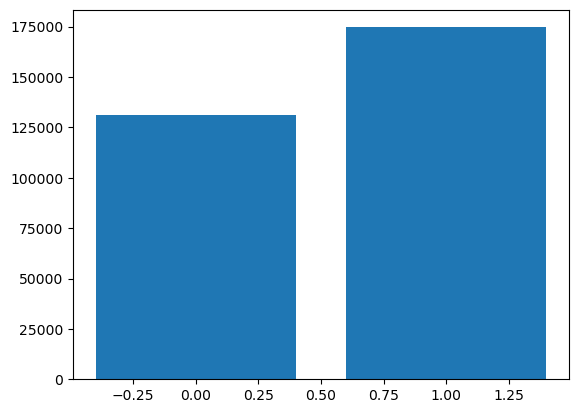

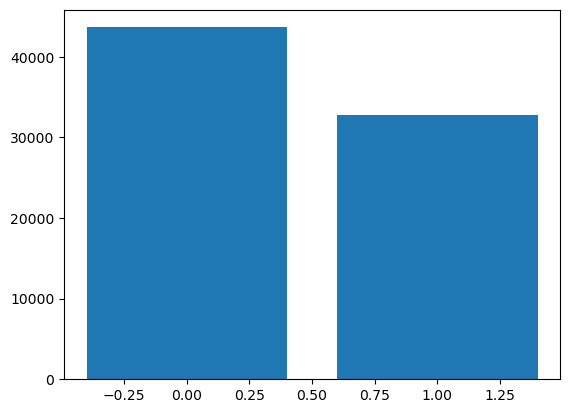

In [5]:
counts_train = Counter(train_y)
counts_train[1.0] = int(counts_train[0.0] * 0.75)
smotenc=SMOTENC(categorical_features=cat_features_idx,random_state=random_state,
            sampling_strategy=counts_train)

train_X_resamp, train_y_resamp = smotenc.fit_resample(train_X,train_y)

counts_test = Counter(test_y)
counts_test[1.0] = int(counts_test[0.0] * 0.75)
smotenc=SMOTENC(categorical_features=cat_features_idx,random_state=random_state,
            sampling_strategy=counts_test)

test_X_resamp, test_y_resamp = smotenc.fit_resample(test_X,test_y)

fig,ax = plt.subplots(1,1)
label_counts = train_y_resamp.groupby(by=lambda idx:train_y_resamp[idx]).count().values
ax.bar(x=train_y_resamp.unique(),height = label_counts)
plt.show()

fig,ax = plt.subplots(1,1)
label_counts = test_y_resamp.groupby(by=lambda idx:test_y_resamp[idx]).count().values
ax.bar(x=test_y_resamp.unique(),height = label_counts)
plt.show()

train_X_resamp.join(train_y_resamp).to_csv("./diabetes_binary_train_oversamp.csv",index=False)
test_X_resamp.join(test_y_resamp).to_csv("./diabetes_binary_test_oversamp.csv",index=False)


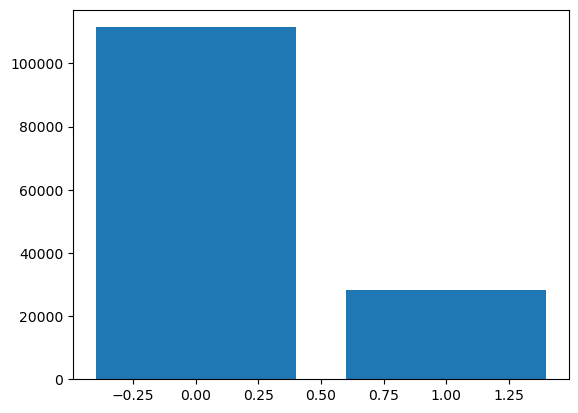

In [7]:
counts_train = Counter(train_y)
counts_train[1.0] = int(counts_train[0.0] * 0.75)
undersampler = EditedNearestNeighbours(kind_sel="all",n_neighbors=5)

train_X_resamp, train_y_resamp = undersampler.fit_resample(train_X,train_y)

fig,ax = plt.subplots(1,1)
label_counts = train_y_resamp.groupby(by=lambda idx:train_y_resamp[idx]).count().values
ax.bar(x=train_y_resamp.unique(),height = label_counts)
plt.show()

train_X_resamp.join(train_y_resamp).to_csv("./diabetes_binary_train_undersamp.csv",index=False)